# Link to the dataset
##Beer production in Australia

https://www.kaggle.com/datasets/saadsikander/beer-production/data

#Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


# Read csv

In [3]:
from google.colab import files
#uploaded = files.upload()
import io
#print(uploaded)
#df = pd.read_csv(io.BytesIO(uploaded['monthly-beer-production-in-austr.xls']),index_col='Month',parse_dates=True)
df = pd.read_csv("monthly-beer-production-in-austr.csv",index_col='Month',parse_dates=True)
df.index.freq='MS'
df = df.rename(columns={"Monthly beer production in Australia": "Monthly beer production"})

MAPE_results = dict()

# Plotting data

<Axes: xlabel='Month'>

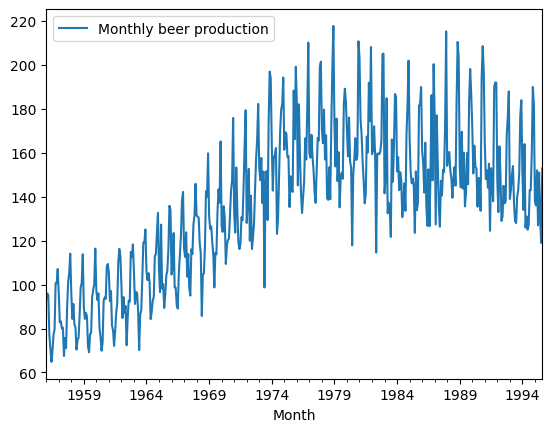

In [4]:
df.plot()

In [ ]:
df

# Models finding

##Splitting the data into test and train

In [ ]:
train=df['Monthly beer production'].iloc[:-12]
test=df['Monthly beer production'].iloc[-12:]

## Holt-Winter Model


###Holt-Winters trend = multiplicative and seasonal = multiplicative

In [ ]:
fitHoltWinter=ExponentialSmoothing(train,
                                   trend='mul',seasonal='mul',seasonal_periods=12).fit()
pred_HW_mm=fitHoltWinter.forecast(len(test)).rename('HW Predict')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

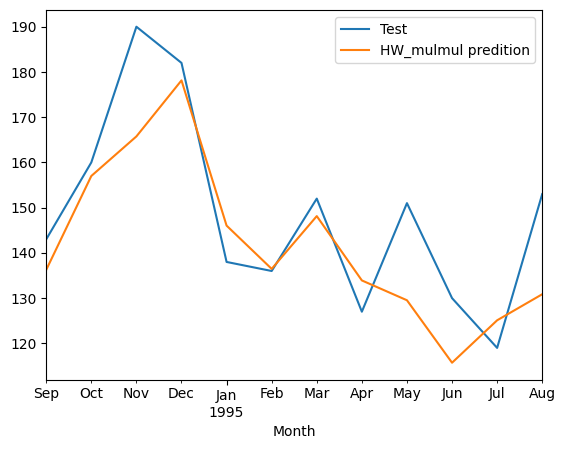

In [ ]:
test.plot(legend=True,label='Test')
pred_HW_mm.plot(legend=True,label='HW_mulmul predition')

In [ ]:
HW_mm_error = mean_absolute_percentage_error(test,pred_HW_mm)*100
MAPE_results['HW_mm_error'] = HW_mm_error
HW_mm_error

6.702583946980025

###Holt-Winters trend = additive and seasonal = multiplicative

In [ ]:
fitHoltWinter=ExponentialSmoothing(train,
                                   trend='add',seasonal='mul',seasonal_periods=12).fit()
pred_HW_am=fitHoltWinter.forecast(len(test)).rename('HW Predict')

<Axes: xlabel='Month'>

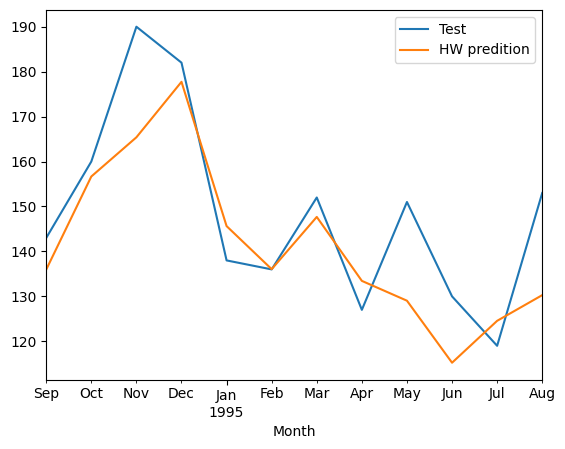

In [ ]:
test.plot(legend=True,label='Test')
pred_HW_am.plot(legend=True,label='HW predition')

In [ ]:
HW_am_error = mean_absolute_percentage_error(test,pred_HW_am)*100
MAPE_results['HW_am_error'] = HW_am_error
HW_am_error

6.76801336472761

###Holt-Winters trend = multiplicative and seasonal = additive

In [ ]:
fitHoltWinter=ExponentialSmoothing(train,
                                   trend='mul',seasonal='add',seasonal_periods=12).fit()
pred_HW_ma=fitHoltWinter.forecast(len(test)).rename('HW Predict')

<Axes: xlabel='Month'>

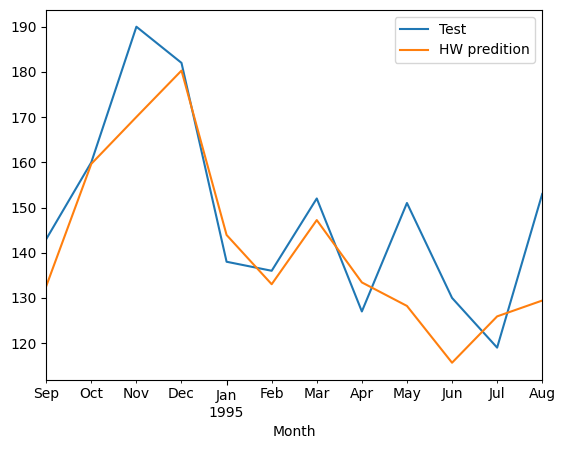

In [ ]:
test.plot(legend=True,label='Test')
pred_HW_ma.plot(legend=True,label='HW predition')

In [ ]:
HW_ma_error = mean_absolute_percentage_error(test,pred_HW_ma)*100
MAPE_results['HW_ma_error'] = HW_ma_error
HW_ma_error

6.746690961676411

###Holt-Winters trend = additive and seasonal = additive

In [ ]:
fitHoltWinter=ExponentialSmoothing(train,
                                   trend='add',seasonal='add',seasonal_periods=12).fit()
pred_HW_aa=fitHoltWinter.forecast(len(test)).rename('HW Predict')

<Axes: xlabel='Month'>

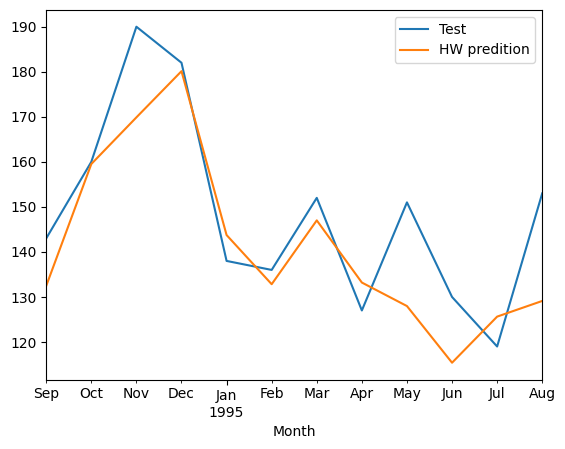

In [ ]:
test.plot(legend=True,label='Test')
pred_HW_aa.plot(legend=True,label='HW predition')

In [ ]:
HW_aa_error = mean_absolute_percentage_error(test,pred_HW_aa)*100
MAPE_results['HW_aa_error'] = HW_aa_error
HW_aa_error

6.801593066906202

###Plotting all results for Holt-Winter

<Axes: xlabel='Month'>

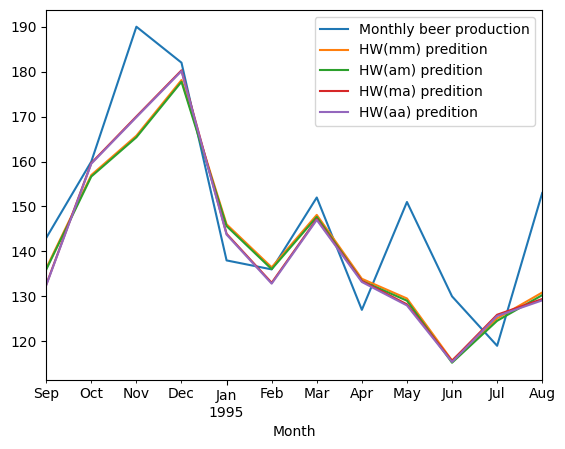

In [ ]:
ax=test.plot(legend=True)
pred_HW_mm.plot(legend=True,label='HW(mm) predition')
pred_HW_am.plot(legend=True,label='HW(am) predition')
pred_HW_ma.plot(legend=True,label='HW(ma) predition')
pred_HW_aa.plot(legend=True,label='HW(aa) predition')

##ARIMA Model

###Auto ARIMA

In [ ]:
auto_arima(df['Monthly beer production'],seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3556.037, Time=3.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4180.337, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3905.859, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3940.279, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4178.356, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3897.413, Time=1.99 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=4.64 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3555.021, Time=10.32 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3645.528, Time=7.55 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=11.58 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3553.553, Time=8.10 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3810.481, Time=5.35 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=7.55 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=3562.891, Time=10.91 sec
 ARIMA(3,1,2)(1,0,2)[12] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -1735.897
Date:                              Tue, 25 Jun 2024   AIC                           3489.795
Time:                                      22:27:09   BIC                           3527.264
Sample:                                  01-01-1956   HQIC                          3504.530
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.010      0.118      0.906      -0.018       0.021
ar.L1         -1.1534      0.004   -321.175      0.000      -1.160      -1.146
ar.L2         -0.9973      0.004   -247.675      0.000      -1.005      -0.989
ma.L1          0.2301      0.023      9.807      0.000       0.184       0.276
ma.L2         -0.0248      0.023     -1.059      0.290      -0.071       0.021
ma.L3         -0.8742      0.021    -40.841      0.000      -0.916      -0.832
ar.S.L12       0.9963      0.004    284.501      0.000       0.989       1.003
ma.S.L12      -0.8189      0.033    -25.190      0.000      -0.883      -0.755
sigma2        82.4017      4.542     18.142      0.000      73.499      91.304
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                37.44
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               3.44   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###SARIMAX fitting

In [ ]:
arima_model=SARIMAX(train,order=(2,1,3),seasonal_order=(1,0,1,12))
arima_result=arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###SARIMAX predict

In [ ]:
start=len(train)
end=start+len(test)-1
predictions_arima=arima_result.predict(start,end).rename('SARIMA pred')

### ARIMA results

<Axes: xlabel='Month'>

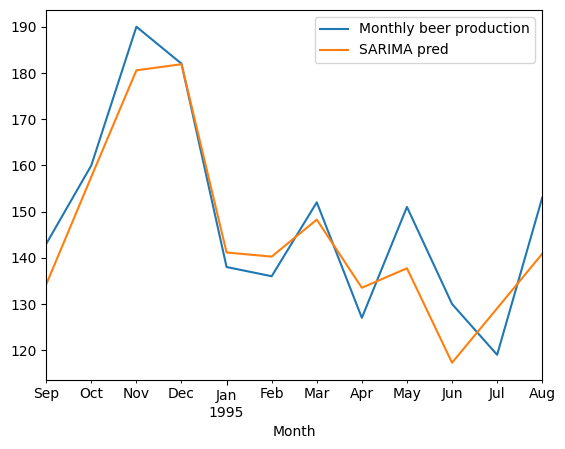

In [ ]:
ax=test.plot(legend=True)
predictions_arima.plot(legend=True)

###MAPE results

In [ ]:
arima_err = mean_absolute_percentage_error(test,predictions_arima)*100
MAPE_results['ARIMA_err'] = arima_err
arima_err

5.054607427177707

##MLP

In [ ]:
def ML_prediction(model, data):
    df_new=data.copy()
    maxx = df_new.max()[0]
    minn = df_new.min()[0]
    df_new = (df_new-minn)/(maxx-minn)
    for i in range(12,0,-1):
        df_new['t= '+str(i)]=df_new['Monthly beer production'].shift(i)
    df_new=df_new.dropna()
    df_new = df_new.iloc[:-12]
    X=df_new.iloc[:,1:].values
    y=df_new.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=17)
    model.fit(X_train,y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    print('Train error: ' + str(mean_absolute_percentage_error(y_train* (maxx-minn) + minn,train_prediction* (maxx-minn) + minn)*100))
    print('Test error: ' + str(mean_absolute_percentage_error(y_test* (maxx-minn) + minn,test_prediction* (maxx-minn) + minn)*100))
    train=df_new[:-12]
    test=data[-12:]

    def get_first_eval_batch(dat, n):
        return dat[-n:].reshape(-1,n)

    n_lag=12
    test_pred = []
    current_batch = get_first_eval_batch(train['Monthly beer production'].values,n_lag)
    for i in range(len(test)):
        current_pred = model.predict(current_batch)[0]
        test_pred.append(current_pred)
        current_batch=np.append(current_batch[:,1:],current_pred).reshape(-1,n_lag)
    df_comp = test['Monthly beer production'].to_frame()
    df_comp['model']=test_pred
    df_comp['model']=df_comp['model'] * (maxx-minn) + minn
    df_comp['Monthly beer production']=df_comp['Monthly beer production'] #* (maxx-minn) + minn
    #print(maxx)
    #print(minn)
    #print(df_comp)
    df_comp.plot()
    pred_err = mean_absolute_percentage_error(df_comp['Monthly beer production'],df_comp['model'])*100
    print('Predicition error: ' + str(pred_err))
    return df_comp['model'], pred_err

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train error: 2.149637766336244
Test error: 8.066167371571119
Predicition error: 6.8859266509039845


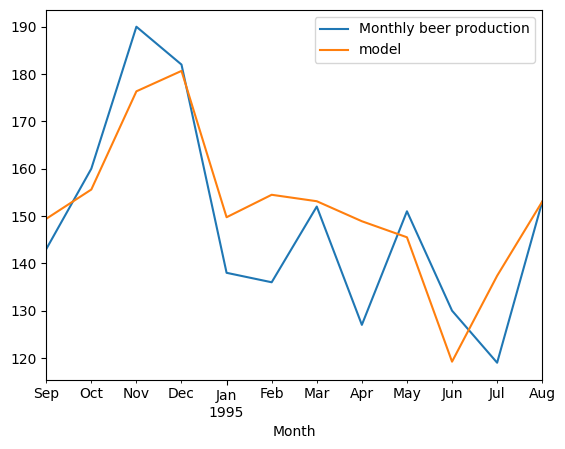

In [ ]:
#train = df.iloc[:-12]
mlp_pred, mlp_err = ML_prediction(MLPRegressor(hidden_layer_sizes=(100, 100, 100), random_state = 0, solver ='lbfgs',max_iter=500), df) #without scaling prediction error 4.54


In [ ]:
MAPE_results['mlp_err'] = mlp_err

## Comparison between best Holt-Winter, SARIMAX and MLP

Best HW error: 6.702583946980025
Sarima error: 5.054607427177707
MLPR error: 6.8859266509039845


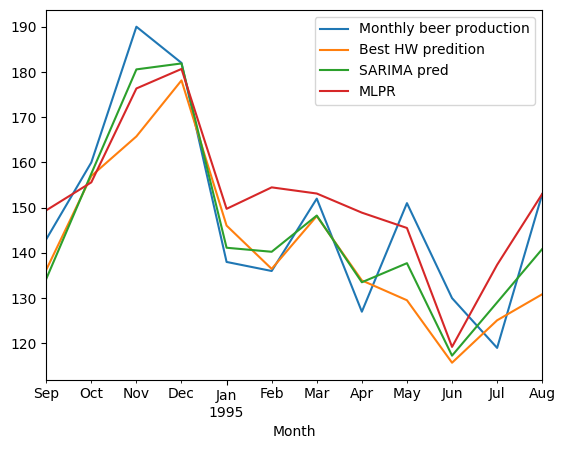

In [ ]:
ax=test.plot(legend=True)
pred_HW_mm.plot(legend=True,label='Best HW predition')
predictions_arima.plot(legend=True)
mlp_pred.plot(legend=True,label='MLPR')
print('Best HW error: ' + str(HW_mm_error))
print('Sarima error: ' + str(arima_err))
print('MLPR error: ' + str(mlp_err))

## Prepering data for RF, XGB, Gradient Boost

In [ ]:
df_copy = df.copy()
df_copy

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [ ]:
for i in range(12,0,-1):
    df_copy["t "+str(i)] = df_copy["Monthly beer production"].shift(i)
df_copy.dropna(inplace=True)
df_copy

,Monthly beer production,t 12,t 11,t 10,t 9,t 8,t 7,t 6,t 5,t 4,t 3,t 2,t 1
Month,,,,,,,,,,,,,
1957-01-01,95.9,93.2,96.0,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1
1957-02-01,82.8,96.0,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9
1957-03-01,83.3,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9,82.8
1957-04-01,80.0,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9,82.8,83.3
1957-05-01,80.4,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9,82.8,83.3,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995-04-01,127.0,126.0,131.0,125.0,127.0,143.0,143.0,160.0,190.0,182.0,138.0,136.0,152.0
1995-05-01,151.0,131.0,125.0,127.0,143.0,143.0,160.0,190.0,182.0,138.0,136.0,152.0,127.0
1995-06-01,130.0,125.0,127.0,143.0,143.0,160.0,190.0,182.0,138.0,136.0,152.0,127.0,151.0


### Splitting data into X and Y

In [ ]:
X = df_copy.iloc[:, 1:]
Y = df_copy.iloc[:, 0]
X.head()

,t 12,t 11,t 10,t 9,t 8,t 7,t 6,t 5,t 4,t 3,t 2,t 1
Month,,,,,,,,,,,,
1957-01-01,93.2,96.0,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1
1957-02-01,96.0,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9
1957-03-01,95.2,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9,82.8
1957-04-01,77.1,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9,82.8,83.3
1957-05-01,70.9,64.8,70.1,77.3,79.5,100.6,100.7,107.1,95.9,82.8,83.3,80.0


In [ ]:
Y.head()

Month
1957-01-01    95.9
1957-02-01    82.8
1957-03-01    83.3
1957-04-01    80.0
1957-05-01    80.4
Freq: MS, Name: Monthly beer production, dtype: float64

###Test and Train split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=420)

## RANDOM FOREST - 1 month in future

---



###Fitting

In [ ]:
random_forest = RandomForestRegressor(random_state=420, n_estimators=1337, max_features=4)
random_forest.fit(x_train.values, y_train.values)

RandomForestRegressor(max_features=4, n_estimators=1337, random_state=420)

###Predict

In [ ]:
train_predict = random_forest.predict(x_train.values)
test_predict = random_forest.predict(x_test.values)

###Plotting the results

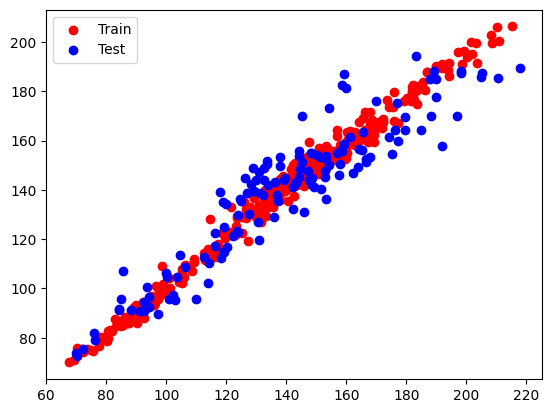

In [ ]:
plt.scatter(y_train, train_predict, c="r", label="Train")
plt.scatter(y_test, test_predict, c="b", label="Test")
plt.legend()

###MAPE results

In [ ]:
random_forest_train_mape = mean_absolute_percentage_error(y_train, train_predict) * 100
random_forest_train_mape

2.1625784593095125

In [ ]:
random_forest_test_mape = mean_absolute_percentage_error(y_test, test_predict) * 100
random_forest_test_mape

6.425460264563958

## Gradient Boost - 1 month in future

###Fitting

In [ ]:
gradient_boost = GradientBoostingRegressor(n_estimators=1337, random_state=420, max_features=4)

In [ ]:
gradient_boost.fit(x_train.values, y_train.values)

GradientBoostingRegressor(max_features=4, n_estimators=1337, random_state=420)

###Predicting

In [ ]:
y_test_pred_gbr = gradient_boost.predict(x_test.values)
y_train_pred_gbr = gradient_boost.predict(x_train.values)

###Plotting the results

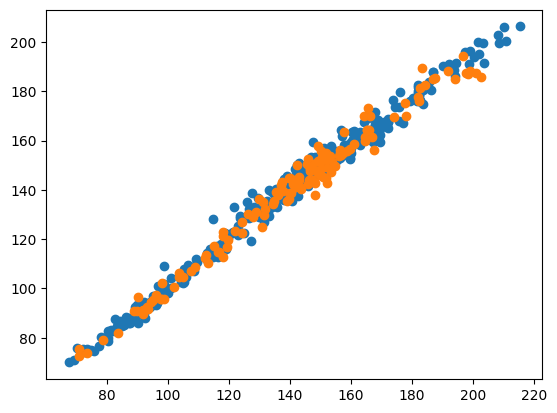

In [ ]:
plt.scatter(y_train_pred_gbr, train_predict)
plt.scatter(y_test_pred_gbr, test_predict)

###MAPE results

In [ ]:
gradient_boost_train_mape = mean_absolute_percentage_error(y_train, y_train_pred_gbr) * 100
gradient_boost_train_mape

0.018265868398640736

In [ ]:
gradient_boost_test_mape = mean_absolute_percentage_error(y_test, y_test_pred_gbr) * 100
gradient_boost_test_mape

6.372291758272906

## XGBOOST - 1 month in future

###Fitting

In [ ]:
xgbreg = xgboost.XGBRegressor(n_estimators=1337, random_state=420)

In [ ]:
xgbreg.fit(x_train.values, y_train.values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1337, n_jobs=None,
             num_parallel_tree=None, random_state=420, ...)

###Predicting

In [ ]:
y_test_pred_xgbreg = xgbreg.predict(x_test.values)
y_train_pred_xgbreg = xgbreg.predict(x_train.values)

###Plotting the results

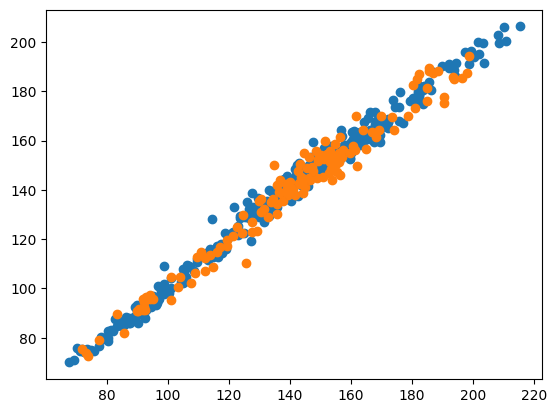

In [ ]:
plt.scatter(y_train_pred_xgbreg, train_predict)
plt.scatter(y_test_pred_xgbreg, test_predict)

###MAPE results

In [ ]:
xgbreg_train_mape = mean_absolute_percentage_error(y_train, y_train_pred_xgbreg) * 100
xgbreg_train_mape

0.0005384929671832609

In [ ]:
xgbreg_test_mape = mean_absolute_percentage_error(y_test, y_test_pred_xgbreg) * 100
xgbreg_test_mape

6.5134866843030395

## 12 months into the future

###Calculations

In [ ]:
def get_first_eval_batch(data, n):
  return data[-n:].reshape(-1,n)

In [ ]:
train = df[:-12]
test = df[-12:]

In [ ]:
n_lag = 12
test_pred_rfr = []
test_pred_grad_boost = []
test_pred_XGB = []
current_batch_rfr = get_first_eval_batch(train["Monthly beer production"].values, n_lag)
current_batch_gradient_boost = get_first_eval_batch(train["Monthly beer production"].values, n_lag)
current_batch_XGB = get_first_eval_batch(train["Monthly beer production"].values, n_lag)
for i in range(len(test)):

  current_pred_rfr = random_forest.predict(current_batch_rfr)[0]
  test_pred_rfr.append(current_pred_rfr)

  current_pred_grad_boost = gradient_boost.predict(current_batch_gradient_boost)[0]
  test_pred_grad_boost.append(current_pred_grad_boost)

  current_pred_XGB = xgbreg.predict(current_batch_XGB)[0]
  test_pred_XGB.append(current_pred_XGB)

  current_batch_rfr = np.append(current_batch_rfr[:,1:], current_pred_rfr).reshape(-1,n_lag)
  current_batch_gradient_boost = np.append(current_batch_gradient_boost[:,1:], current_pred_grad_boost).reshape(-1,n_lag)
  current_batch_XGB = np.append(current_batch_XGB[:,1:], current_pred_XGB).reshape(-1,n_lag)

###Plotting the results

<Axes: xlabel='Month'>

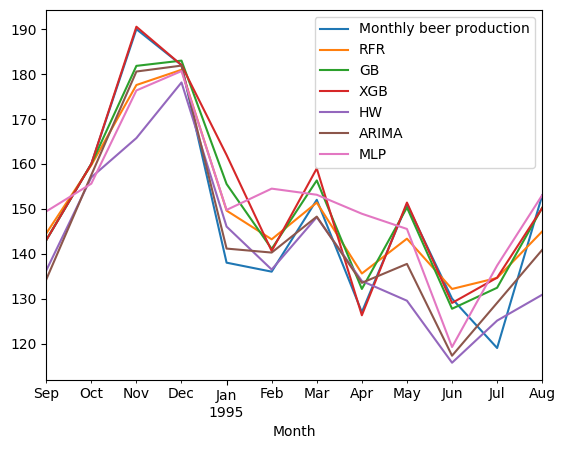

In [ ]:
df_comp = test["Monthly beer production"].to_frame()
df_comp['RFR'] = test_pred_rfr
df_comp['GB'] = test_pred_grad_boost
df_comp['XGB'] = test_pred_XGB
df_comp['HW'] = pred_HW_mm
df_comp["ARIMA"] = predictions_arima
df_comp["MLP"] = mlp_pred
df_comp.plot()

### MAPE results

In [ ]:
MAPE_rfr = (mean_absolute_percentage_error(test["Monthly beer production"], df_comp['RFR']) * 100)
MAPE_results['RFR_12_month_mape'] = MAPE_rfr
MAPE_rfr

In [ ]:
MAPE_gb = (mean_absolute_percentage_error(test["Monthly beer production"], df_comp['GB']) * 100)
MAPE_results['GB_12_month_mape'] = MAPE_gb
MAPE_gb

In [ ]:
MAPE_XGB = (mean_absolute_percentage_error(test["Monthly beer production"], df_comp['XGB']) * 100)
MAPE_results['XGB_12_month_mape'] = MAPE_XGB
MAPE_XGB

#Comparing the results for different methods

In [ ]:
MAPE_results

In [ ]:
df_results = pd.DataFrame.from_dict(MAPE_results, orient='index', columns=["MAPE result"])
df_results

In [ ]:
df_results.idxmin()